# Model III : Regression trees

The main purpose of this script is to obtain a third model for the ensembling method. The conclusion and test prediciton are at the end.

### Total running time ~1 min (unbiased memory MacOS 16GB)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, validation_curve
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import make_scorer
from sklearn import tree
import matplotlib.pyplot as plt
from scipy import stats

**Reminder:** <br> In Binary Tree Structure each node represents a decision based on a specific feature or variable. The tree is binary, meaning that each node has two child nodes, and the dataset is divided into two subsets at each decision point. While regression trees are primarily designed for numerical data, they can handle categorical variables as well. 

In [2]:
data5 = pd.read_csv('data/data_after_prep.csv')

In [3]:
data5

,dewp_temp,feat08,feat09,holiday,hour,humidity,rented_bike_count,solar_radiation,temperature,visibility,wind_speed,weekend,Autumn,Spring,Summer,Winter,rainfall_binary,snowfall_binary
0,21.6,0.758270,0.567133,0,14,72,1030,0.91,27.1,1126,3.0,0,0,0,1,0,0,0
1,15.8,0.366201,0.444052,0,6,84,505,0.01,18.6,316,0.7,0,0,1,0,0,0,0
2,-19.6,0.549105,0.189687,0,23,47,115,0.00,-10.5,1794,2.8,0,0,0,0,1,0,0
3,-8.4,0.605013,0.190490,0,1,54,280,0.00,-0.2,1747,0.5,1,0,0,0,1,0,0
4,-13.1,0.452029,0.357426,0,5,56,84,0.00,-5.8,1941,2.0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10650,1.7,0.265410,0.425335,0,4,70,188,0.00,6.9,1314,1.5,1,1,0,0,0,0,0
10651,18.5,0.416586,0.096081,0,6,98,69,0.00,18.9,338,0.3,0,0,1,0,0,0,0
10652,19.8,0.369133,0.383591,0,10,76,913,1.58,24.4,617,2.1,0,0,0,1,0,0,0
10653,-8.3,0.458393,0.493100,1,10,53,191,1.12,0.1,1022,5.3,0,0,1,0,0,0,0


In [4]:
X = data5.drop(columns=['rented_bike_count']) 
y = data5['rented_bike_count']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
len(X_train)

7458

# Step 1: Estimate the model

In [6]:
DTR =  DecisionTreeRegressor(max_depth=3) # how many nodes)
DTR.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

[Text(0.5, 0.875, 'x[7] <= 9.65\nsquared_error = 376945.394\nsamples = 7458\nvalue = 627.832'),
 Text(0.25, 0.625, 'x[11] <= 0.5\nsquared_error = 68752.48\nsamples = 3955\nvalue = 287.879'),
 Text(0.125, 0.375, 'x[4] <= 6.5\nsquared_error = 35191.199\nsamples = 3505\nvalue = 243.465'),
 Text(0.0625, 0.125, 'squared_error = 6868.878\nsamples = 1080\nvalue = 112.222'),
 Text(0.1875, 0.125, 'squared_error = 36717.202\nsamples = 2425\nvalue = 301.915'),
 Text(0.375, 0.375, 'x[4] <= 6.5\nsquared_error = 195122.654\nsamples = 450\nvalue = 633.813'),
 Text(0.3125, 0.125, 'squared_error = 28127.191\nsamples = 188\nvalue = 305.851'),
 Text(0.4375, 0.125, 'squared_error = 182390.529\nsamples = 262\nvalue = 869.145'),
 Text(0.75, 0.625, 'x[4] <= 15.5\nsquared_error = 447108.514\nsamples = 3503\nvalue = 1011.65'),
 Text(0.625, 0.375, 'x[6] <= 0.315\nsquared_error = 226871.481\nsamples = 2301\nvalue = 745.392'),
 Text(0.5625, 0.125, 'squared_error = 125624.819\nsamples = 1101\nvalue = 462.601'),
 T

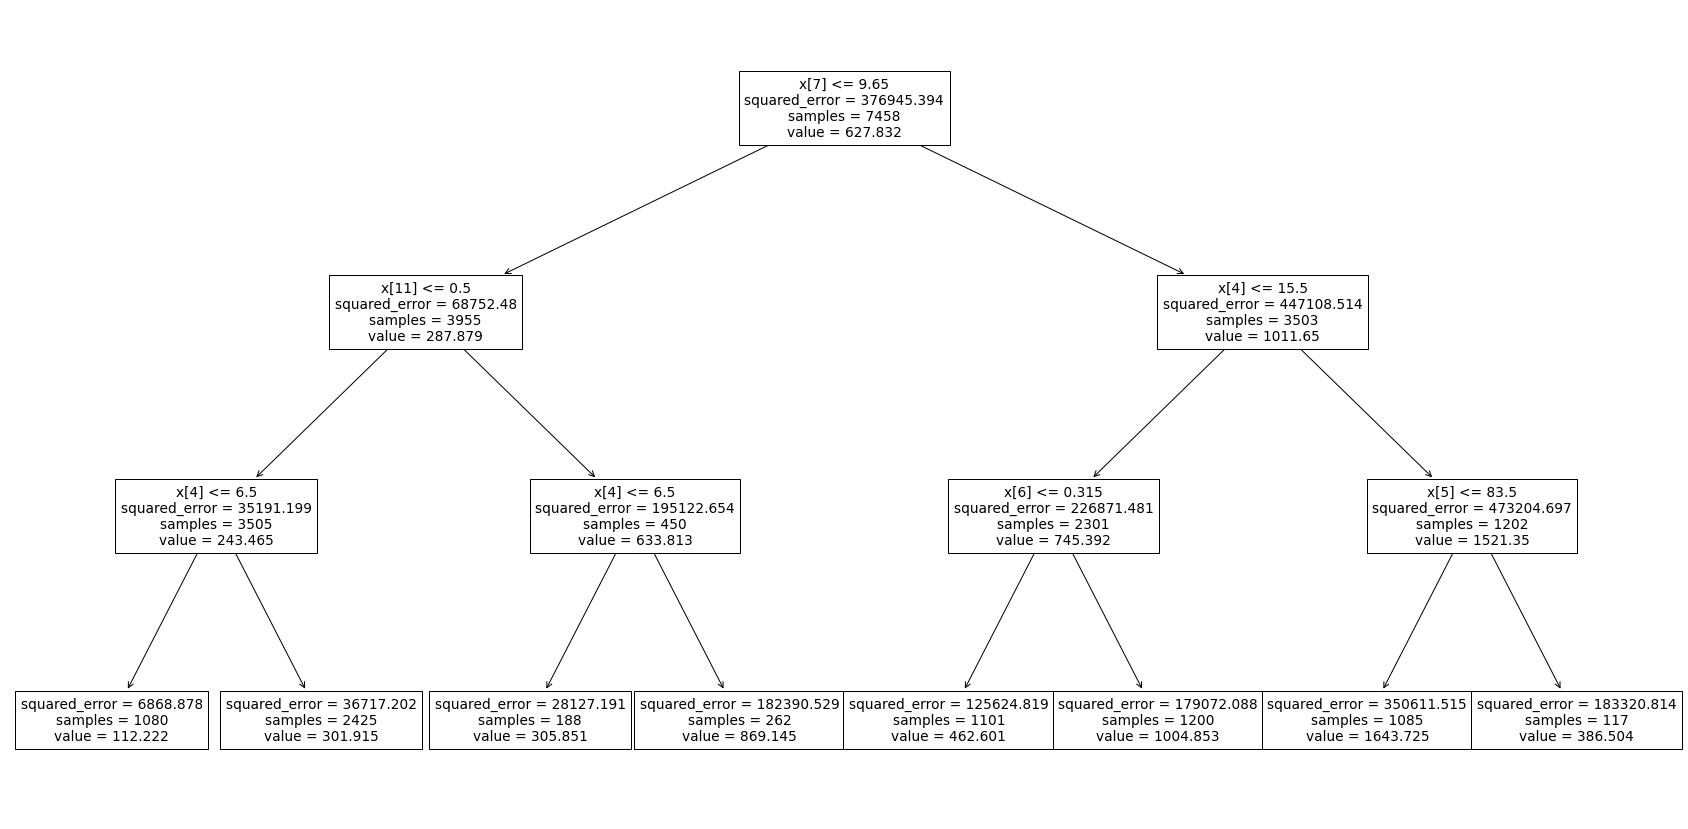

In [7]:
# Plot the tree

plt.figure(figsize=(30,15))
tree.plot_tree(DTR)

"Value" on the above plot is a predicted target value.

In [8]:
part = X_train[X_train.temperature>9.65]

print("Proportion of observations in right 1 node: " + str(round(100*(len(part)/len(X_train)), 1))+ "%")

Proportion of observations in right 1 node: 47.0%


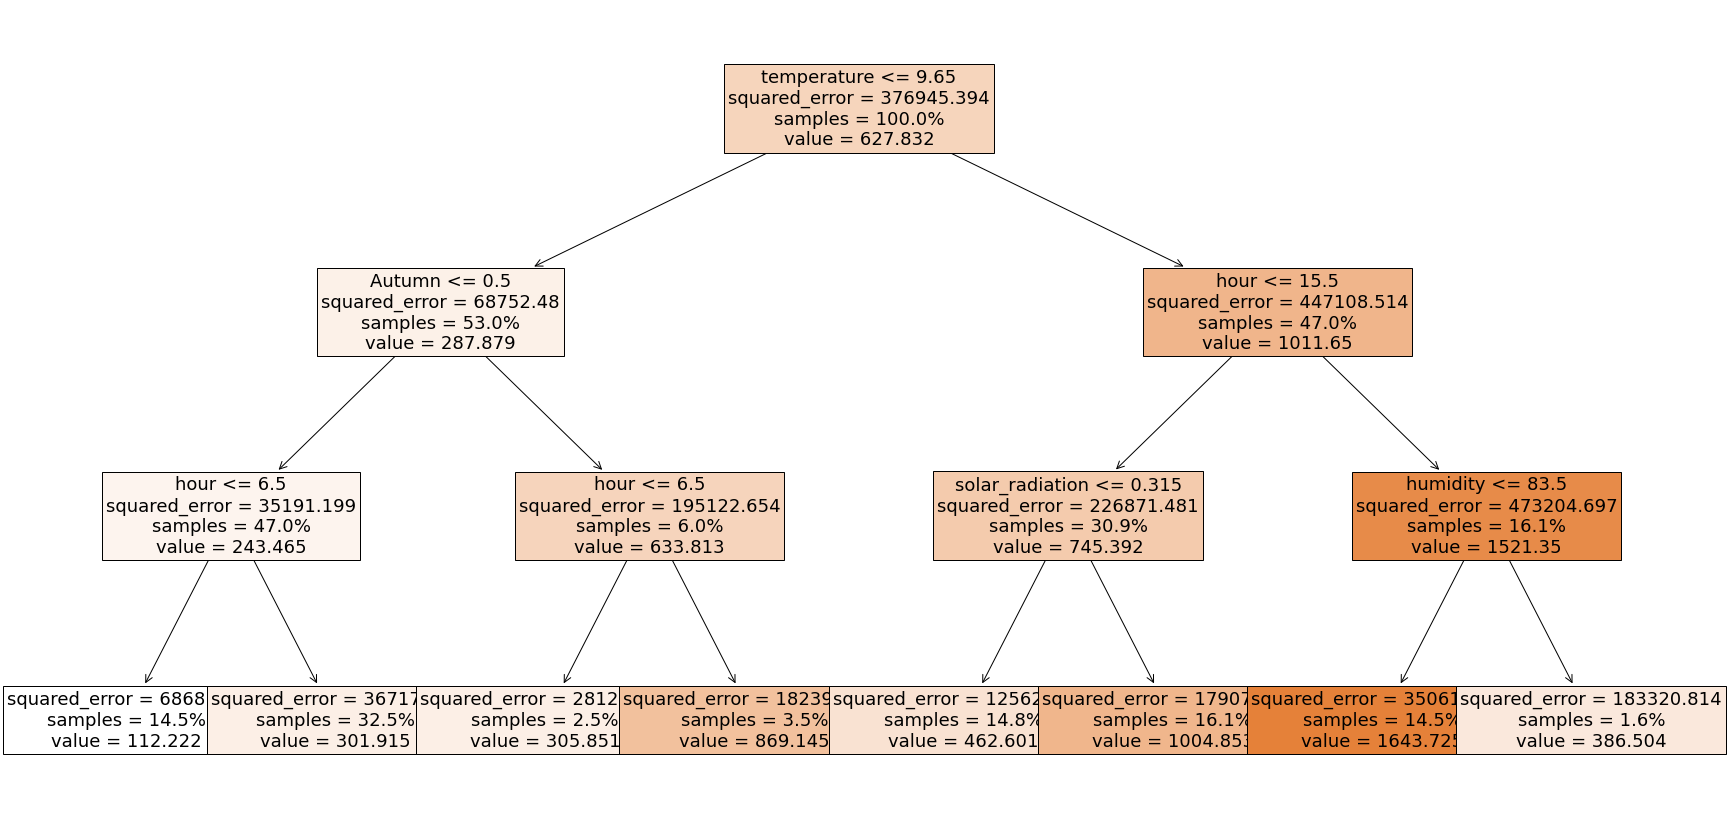

In [9]:
fig = plt.figure(figsize=(30,15))
_ = tree.plot_tree(DTR, feature_names=X_train.columns, filled=True, fontsize=18, proportion =True)


### MAE and MSE

In [10]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores_mae = cross_val_score(DTR, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores_mse = cross_val_score(DTR, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

In [11]:
scores_mae = abs(scores_mae)
scores_mse = abs(scores_mse)
print('Mean MAE: %.3f (%.3f) Mean MSE: %.3f' % (scores_mae.mean(), scores_mae.std(), scores_mse.mean()) )

Mean MAE: 237.049 (6.931) Mean MSE: 124815.898


### MAPE

In [12]:
DTR.fit(X_train, y_train)  
y_pred = DTR.predict(X_train)  

In [13]:
def custom_mape_scorer(y_true, y_pred):
    ape = abs((y_true - y_pred) / y_true) * 100
    return np.mean(ape)

In [14]:
mape_scores = cross_val_score(DTR, X_train, y_train, cv=5, scoring=make_scorer(custom_mape_scorer))

print("MAPE scores:", mape_scores)
print("Mean MAPE:", np.mean(mape_scores))

MAPE scores: [122.28188683 141.0024168  120.19332014 128.71792884 134.76348255]
Mean MAPE: 129.391807032781


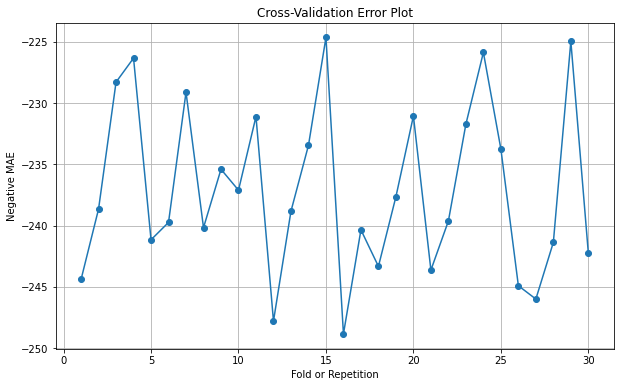

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(scores_mae) + 1), -scores_mae, marker='o', linestyle='-')
plt.xlabel('Fold or Repetition')
plt.ylabel('Negative MAE')
plt.title('Cross-Validation Error Plot')
plt.grid(True)
plt.show()

In [16]:
train_sizes, train_scores, val_scores = learning_curve(
    DTR, X_train, y_train, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)

In [17]:
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = -np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

The number of training samples remains constant throughout this process.

We see that out results at this point are rather terrible, let's tune the parameters.

# Step 2: GridSearch Cross-Validation on initial parameters

In [18]:
param_grid = {
    'max_depth': [None, 5, 10, 20, 30],  
    'min_samples_split': [5, 7, 9], 
    'min_samples_leaf': [2, 3, 4] 
}

In [19]:
# # Create the DecisionTreeRegressor
# DTR =  DecisionTreeRegressor()

# Create GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=DTR, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(max_depth=3),
             param_grid={'max_depth': [None, 5, 10, 20, 30],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [5, 7, 9]},
             scoring='neg_mean_squared_error')

In [20]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_regressor = DecisionTreeRegressor(**best_params)
best_regressor.fit(X_train, y_train)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 9}


DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=9)

# Step 3: See how parameters impact the evaluation metric

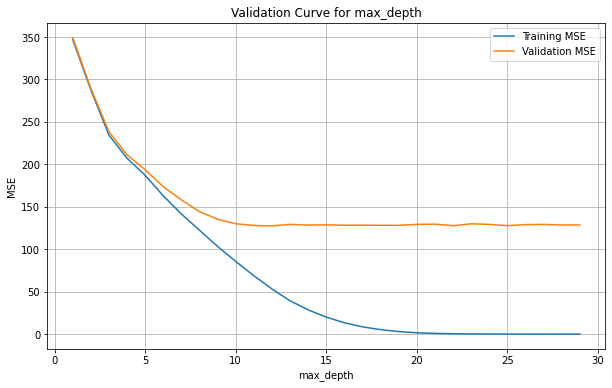

In [21]:
DTR = DecisionTreeRegressor(random_state=123)

values = list(range(1, 30, 1))
max_depth_values = values
train_scores, validation_scores = validation_curve(
    DTR,
    X_train, y_train, param_name='max_depth', param_range=max_depth_values,
    scoring='neg_mean_absolute_error', cv=5)
train_mse = -train_scores.mean(axis=1)
validation_mse = -validation_scores.mean(axis=1)
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_mse, label='Training MSE')
plt.plot(max_depth_values, validation_mse, label='Validation MSE')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.title('Validation Curve for max_depth')
plt.legend()
plt.grid()
plt.show()


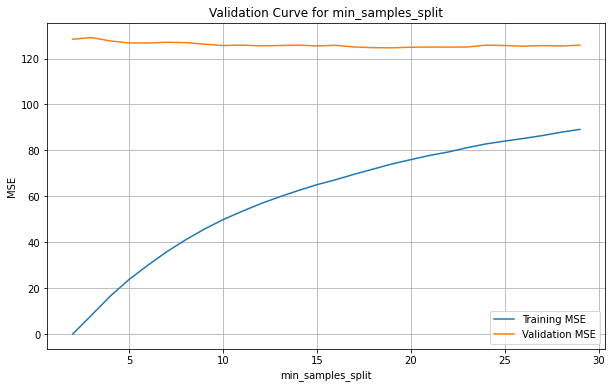

In [22]:
DTR = DecisionTreeRegressor(random_state=123)

values = list(range(1, 30, 1))
max_depth_values = values
train_scores, validation_scores = validation_curve(
    DTR,
    X_train, y_train, param_name='min_samples_split', param_range=max_depth_values,
    scoring='neg_mean_absolute_error', cv=5)
train_mse = -train_scores.mean(axis=1)
validation_mse = -validation_scores.mean(axis=1)
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_mse, label='Training MSE')
plt.plot(max_depth_values, validation_mse, label='Validation MSE')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.title('Validation Curve for min_samples_split')
plt.legend()
plt.grid()
plt.show()


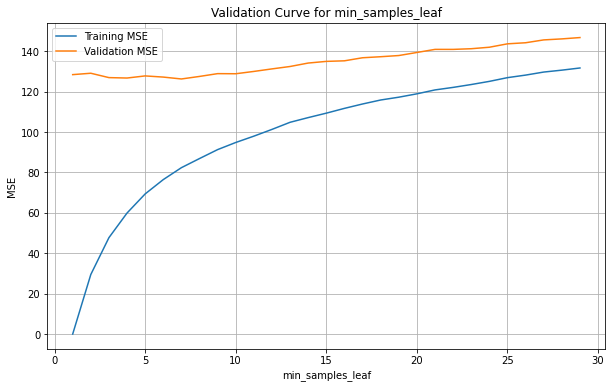

In [23]:
DTR = DecisionTreeRegressor(random_state=123)

values = list(range(1, 30, 1))
max_depth_values = values
train_scores, validation_scores = validation_curve(
    DTR,
    X_train, y_train, param_name='min_samples_leaf', param_range=max_depth_values,
    scoring='neg_mean_absolute_error', cv=5)
train_mse = -train_scores.mean(axis=1)
validation_mse = -validation_scores.mean(axis=1)
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_mse, label='Training MSE')
plt.plot(max_depth_values, validation_mse, label='Validation MSE')
plt.xlabel('min_samples_leaf')
plt.ylabel('MSE')
plt.title('Validation Curve for min_samples_leaf')
plt.legend()
plt.grid()
plt.show()


# Step 4: Compare the performance

In [24]:
# 1st model: Mean MAE: 237.049 (6.931) Mean MSE: 124815.898 Mean MAPE: 41.29718887824987

### MAE and MSE

In [25]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores_mae = cross_val_score(best_regressor, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores_mse = cross_val_score(best_regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores_mae = abs(scores_mae)
scores_mse = abs(scores_mse)
print('Mean MAE: %.3f (%.3f) Mean MSE: %.3f' % (scores_mae.mean(), scores_mae.std(), scores_mse.mean()) )


Mean MAE: 128.136 (8.182) Mean MSE: 46510.471


In [26]:
best_regressor.fit(X_train, y_train)  
y_pred = best_regressor.predict(X_train)  

In [27]:
mape_scores = cross_val_score(best_regressor, X_train, y_train, cv=5, scoring=make_scorer(custom_mape_scorer))

print("MAPE scores:", mape_scores)
print("Mean MAPE:", np.mean(mape_scores))

MAPE scores: [41.16557353 51.88791372 47.97888736 52.08530364 66.64424951]
Mean MAPE: 51.95238555240601


Quite an improvement!

# Step 5: Seek for more fields for the improvement

In [28]:
transformed_rented_bike_count, lambda_best_fit = stats.boxcox(data5['rented_bike_count'])

In [29]:
boxcox_target = pd.DataFrame()
boxcox_target['boxcox_rented_bike_count'] = transformed_rented_bike_count

In [30]:
X = data5.drop(columns=['rented_bike_count']) 
y = boxcox_target['boxcox_rented_bike_count']

In [31]:
X_train, X_test, y_train_t, y_test_t = train_test_split(X, y, test_size=0.3, random_state=123)
len(X_train)

7458

Grid Search in this model is very time-saving.

In [32]:
param_grid = {
    'max_depth': [5, 10, 20, 30],  
    'min_samples_split': [5, 7, 9], 
    'min_samples_leaf': [2, 3, 4] 
}
# # Create the DecisionTreeRegressor
# DTR =  DecisionTreeRegressor()

grid_search = GridSearchCV(estimator=DTR, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train_t)

best_params2 = grid_search.best_params_
print("Best Hyperparameters:", best_params2)

best_regressor2 = DecisionTreeRegressor(**best_params2)
best_regressor2.fit(X_train, y_train)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 3, 'min_samples_split': 9}


In [33]:
# evaluate model
scores_mae = cross_val_score(best_regressor2, X_train, y_train_t, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores_mse = cross_val_score(best_regressor2, X_train, y_train_t, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores_mae = abs(scores_mae)
scores_mse = abs(scores_mse)
print('Mean MAE: %.3f (%.3f) Mean MSE: %.3f' % (scores_mae.mean(), scores_mae.std(), scores_mse.mean()) )

best_regressor2.fit(X_train, y_train_t)  
y_pred = best_regressor2.predict(X_train)  
mape_scores = cross_val_score(best_regressor2, X_train, y_train_t, cv=5, scoring=make_scorer(custom_mape_scorer))

print("MAPE scores:", mape_scores)
print("Mean MAPE:", np.mean(mape_scores))


Mean MAE: 0.779 (0.044) Mean MSE: 1.591
MAPE scores: [9.97330993 9.56308976 8.17691095 8.42716469 9.40231016]
Mean MAPE: 9.108557095079979


A huge improvement.

# Step 5: Conclusion

The GridSearchCV method improved the model twice. The ranges of grid parameters were at first shot suited approprietly, which is observable on the plots of performance metric vs. the parameter. Moreover, we the precude of GridSearchCV went the fastest out of three models: Random Forest, XGBOOST, Decision Regression Tree. 

As well for this model, and for the previous ones, the Box-Cox transformation of target variable to the normal distribution improved its performance.

# Step 6: Final prediciton

In [34]:
y_test_pred = best_regressor2.predict(X_test)  

In [35]:
scores_mae = cross_val_score(best_regressor2, X_test, y_test_t, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores_mse = cross_val_score(best_regressor2, X_test, y_test_t, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

scores_mae = abs(scores_mae)
scores_mse = abs(scores_mse)

print('Mean MAE: %.3f (%.3f) Mean MSE: %.3f' % (scores_mae.mean(), scores_mae.std(), scores_mse.mean()) )

mape_scores = cross_val_score(best_regressor2, X_test, y_test_t, cv=5, scoring=make_scorer(custom_mape_scorer))

print("MAPE scores:", mape_scores)
print("Mean MAPE:", np.mean(mape_scores))

Mean MAE: 0.915 (0.061) Mean MSE: 1.928
MAPE scores: [ 9.87938875 12.16341664  8.64265319 10.94926105 12.00622455]
Mean MAPE: 10.728188834866533


Train sample MAPE ~9 vs test sample MAPE ~10.

In [36]:
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.to_csv('y_pred_DTR.csv', index=False)

In [37]:
y_test_t = pd.DataFrame(y_test_t)
y_test_t.to_csv('y_test_t.csv', index=False)

# For reverse from box-cox transformed values to the real interpretable values please see the ensembling script.